> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [23]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()                           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Notes
One thing I'm noticiing here is that all of the cells I probably want to explore havr 10866 entries. keywords and genres might be usful but right now I'm not planning on using those and the data is incomplete for both.

In [11]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Notes
So far just getting some info on the data and checking out the head to understand the structure. Looking at this, I'm thinking there are a few string data that might not be interesting to me. I'm thinking of exploring revenue as the dependent variable and using budget, popularity, runtime to determine correlations there. I am wondering what vote_count and vote_average are. I will need to explore this further


In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df.shape #i read about this tuple thing on stackoverflow and i still dont get it so im not wasting more time on it

(10866, 21)

## Considering Drops
I'm thinking I'd like to drop id, imdb_id, cast, title, director, genres, and production companies. Genres might actuallt be usful to break up based on the | character that they are using, but I might be able to glean enough insights without doing that so we'll see.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 


In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','cast','homepage','director','tagline','overview','production_companies', 'release_date'], axis = 1, inplace = True)
#I'm also considering dropping genres and keywords but I haven't decided yet.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [16]:
df[df.keywords.isnull()]

,popularity,budget,revenue,original_title,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
130,1.284541,0,4719695,True Story,NaN,100,Crime|Drama|Mystery,354,6.0,2015,0.000000e+00,4.342117e+06
149,1.041922,20000000,0,Momentum,NaN,96,Thriller|Action,100,5.8,2015,1.839999e+07,0.000000e+00
154,1.008474,12000000,0,Il racconto dei racconti,NaN,125,Romance|Fantasy|Horror,211,5.7,2015,1.104000e+07,0.000000e+00
155,1.007054,11000000,27391084,Irrational Man,NaN,95,Mystery|Drama,319,6.1,2015,1.012000e+07,2.519979e+07
160,0.950793,12000000,60273173,The Perfect Guy,NaN,100,Drama|Thriller,122,5.6,2015,1.104000e+07,5.545129e+07
164,0.917040,0,0,Kidnapping Mr. Heineken,NaN,95,Drama|Action|Crime|Thriller,131,5.8,2015,0.000000e+00,0.000000e+00
178,0.836941,0,3002884,The End of the Tour,NaN,106,Drama,126,7.3,2015,0.000000e+00,2.762652e+06
180,0.829111,20000000,6420319,Little Boy,NaN,106,Comedy|Drama|War,113,7.1,2015,1.839999e+07,5.906691e+06
182,0.820691,0,1986615,Remember,NaN,94,Drama|Thriller,75,7.7,2015,0.000000e+00,1.827685e+06
189,0.781809,0,0,The Benefactor,NaN,90,Drama,55,4.5,2015,0.000000e+00,0.000000e+00


In [17]:
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [18]:
df.drop(['keywords','genres'], axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 849.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### hypothesis: revenue increase correlates positivley with popularity

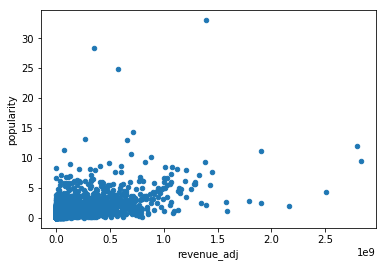

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.plot.scatter(x= 'revenue_adj', y='popularity')

This scatter does indiciate a positive correlation between revenue and popularity. More advanced techniques would be required to explore further including regression analysis and inferential stats.



Text(0,0.5,'Revenue')

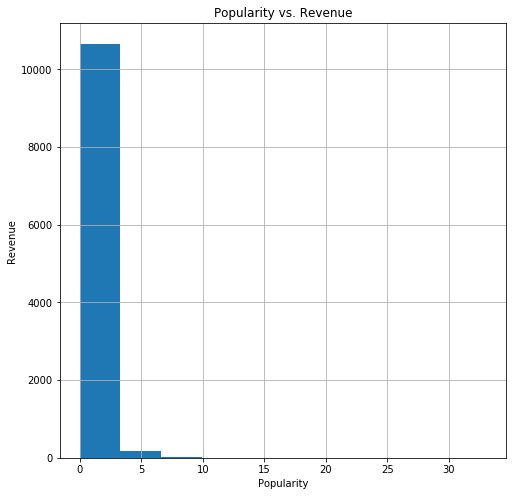

In [24]:
df.popularity.hist(figsize = (8,8));
pl.title("Popularity vs. Revenue")
pl.xlabel("Popularity")
pl.ylabel("Revenue")

perhaps there is no clear correlation between popularity and revenue because popularity is extremely right scewed

### hypothesis: budget increase correlates positivley with revenue

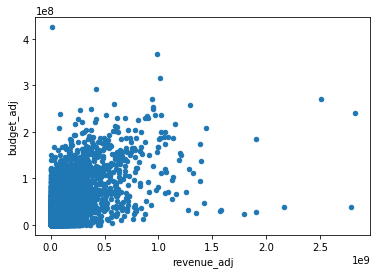

In [62]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.plot.scatter(x= 'revenue_adj', y='budget_adj')


this plot does indicate a positive correlation between budget and revenue

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

There appears to be a positive correlation between budget and revenue, there does not appear to be a correlation between popularity and revenue. This is likley because the popularity data is very right scewed.

Limitations of this study included that not all data was available, so any inferences made can not be generalized to the population of movies

Further, no interfential statistics was used, so we can not infer findings about this population, only make correlative statements about the data we analyzed